# Rule Adherence:

-Rule 1: We have documented the code used to generate all basic visualizations in this notebook.

-Rule 7: The raw data behind each visualization is provided, allowing readers to reproduce the plots.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datas

### Row Data

In [17]:
df_raw = pd.read_csv('Data/strava.csv')

### Datasets for Plotting

In [5]:
df_before_plot = pd.read_csv('Data/before_running.csv', parse_dates=['timestamp'], index_col='timestamp')
df_during_plot = pd.read_csv('Data/during_running.csv', parse_dates=['timestamp'], index_col='timestamp')
df_after_plot = pd.read_csv('Data/after_running.csv', parse_dates=['timestamp'], index_col='timestamp')

### Histograms

Upon observation, it became apparent that the variables - 'Air Power', 'Cadence', 'Form Power', 'Ground Time', 'Leg Spring Stiffness', 'Power', and 'Vertical Oscillation' - primarily contain values in the dataset corresponding to the 'during exercise' period. To understand the characteristics and behavior of these variables more clearly, I aim to examine their distributions.

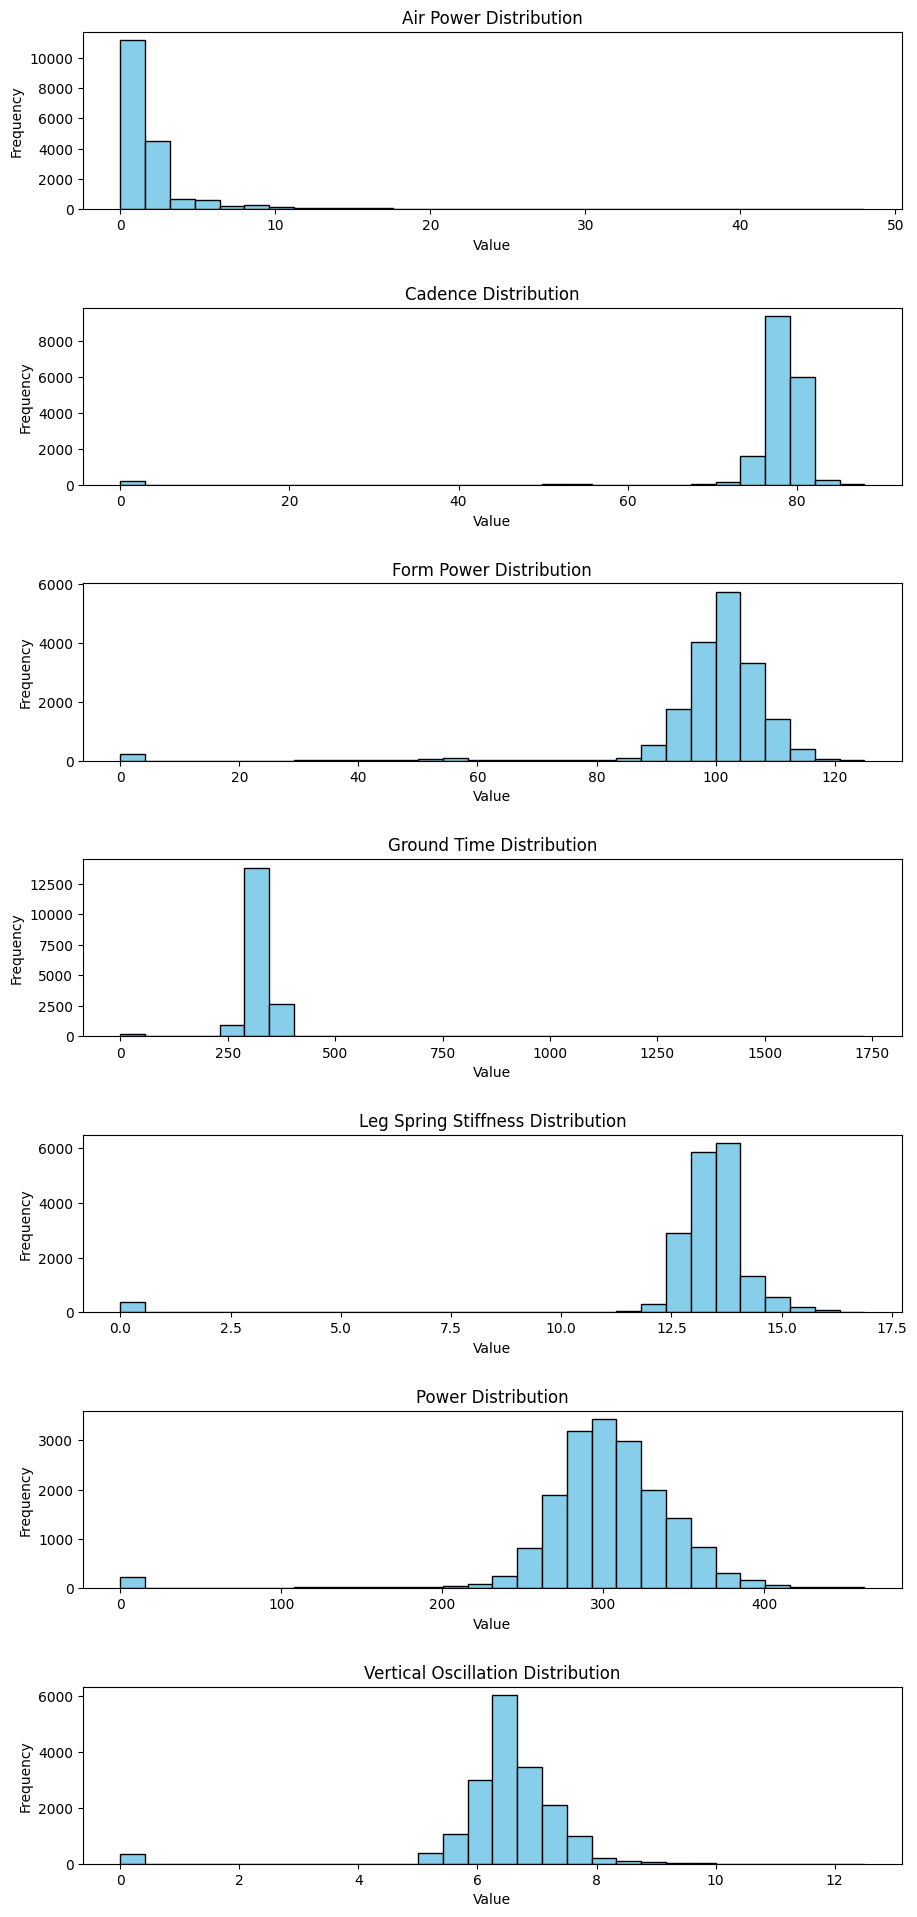

In [10]:


# List of columns
columns = ['Air Power', 'Cadence', 'Form Power', 'Ground Time', 
           'Leg Spring Stiffness', 'Power', 'Vertical Oscillation']

fig, axs = plt.subplots(len(columns), figsize=(10, 20))  # create subplot grid
fig.tight_layout(pad=5.0)

for i, col in enumerate(columns):
    axs[i].hist(df_during_plot[col].dropna(), bins=30, color='skyblue', edgecolor='black') 
    axs[i].set_title(f'{col} Distribution')
    axs[i].set_xlabel('Value')  # x-label
    axs[i].set_ylabel('Frequency')  # y-label

plt.show()



Air Power is typically low during most of the exercise, with only occasional spikes or moments of higher intensity where more Air Power is used. This could align with exercise routines where short bursts of high intensity are followed by longer periods of lower intensity or rest.

The Cadence histogram might be normally distributed around a central value, indicating that there's a common cadence that most exercisers maintain. Variations could be due to changes in exercise intensity or type.

The Form Power histogram, exhibiting a normal distribution, indicates that the majority of values are concentrated around a specific central value, implying a consistent level of Form Power exerted during exercise. This consistency suggests a well-regulated and balanced exercise regimen, possibly designed to maintain this specific level of Form Power. Interpretation of this data, particularly its implications, should consider other performance indicators and the individual's exercise goals.

The Ground Time histogram, with a dominant central bar and comparatively lower side bars, indicates a concentrated distribution around the median value. This suggests that, during the exercise, the majority of measurements record a similar Ground Time. This could imply that the subject consistently spent a similar amount of time on the ground between jumps or strides, which might be indicative of a steady and uniform pace or rhythm during the exercise. 

The Leg Spring Stiffness histogram suggests a bimodal distribution. This may indicate two different common stiffness levels during the exercise. The subject might have switched between two types of movements, or the data might reflect periods of varying intensity or technique. This could also potentially reflect a transition in exercise routine, and might warrant further investigation.


Power histogram is normally distributed, it suggests that most of the power values during the exercise were around the mean. This indicates a consistent intensity of workout throughout the exercise session. The shape of the normal distribution tells that most of the time, the workout was conducted at an average power level, with fewer occurrences of extremely high or low power levels. This kind of consistency can be beneficial for steady-state endurance training. However, if the goal was to have intervals of high-intensity exercise, this distribution might suggest the need for adjustment in the workout routine.

Vertical Oscillation data indicates generally good running efficiency with a few moments of exceptionally low oscillation, possibly indicating very efficient running or periods of rest.

### Box Plots

Box plot will enable us to understand whether the exercise has a significant impact on heart rate by comparing the median heart rate and spread before, during, and after the exercise. It also allows us to spot if there are any unusually high or low heart rates (outliers) during these stages.

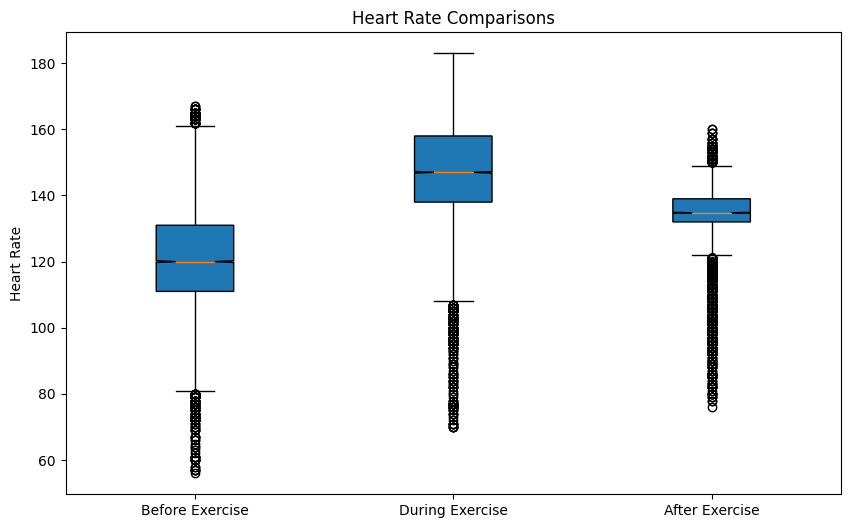

In [6]:

heart_rates = [df_before_plot['heart_rate'].dropna(), 
               df_during_plot['heart_rate'].dropna(), 
               df_after_plot['heart_rate'].dropna()]

plt.figure(figsize=(10, 6))  
plt.boxplot(heart_rates, notch=True, patch_artist=True)
plt.xticks([1, 2, 3], ['Before Exercise', 'During Exercise', 'After Exercise'])
plt.title('Heart Rate Comparisons')
plt.ylabel('Heart Rate')
plt.show()

The median heart rate before exercise is around 120 BPM, as indicated by the line within the box. Half of the recorded heart rates fall between approximately 140 and 160 BPM, as represented by the height of the box. The data's spread, excluding outliers, ranges from around 80 BPM to 160 BPM, as shown by the whiskers. There are a lot unusually high or low heart rates, depicted as points beyond the whiskers.

The median heart rate during exercise is around 150 BPM. Half of the recorded heart rates fall between approximately 110 and 130 BPM. The data's spread, excluding outliers, ranges from around 90 BPM to 190 BPM. There are a lot low heart rates, depicted as points beyond the whiskers.

The median heart rate after exercise is around 135 BPM. Half of the recorded heart rates fall between approximately 130 and 150 BPM. The data's spread, excluding outliers, ranges from around 125 BPM to 150 BPM. There are a lot low heart rates and some high heart rates, depicted as points beyond the whiskers.

Insights: During exercise, heart rates naturally increase, as evidenced by the median heart rate rising from 120 BPM pre-exercise to 150 BPM. The spread of heart rates during exercise suggests a range of exercise intensities, while the post-exercise median of 135 BPM shows the body's recovery process. Outliers could be attributed to various factors, such as individual health status or periods of intense exertion or rest. The narrower range of heart rates post-exercise indicates a return to a more normalized state. These findings illustrate the physiological impacts of exercise, though individual responses can vary based on factors such as fitness level, type of exercise, and health status.

### Bar Charts

In our analysis, we employed bar charts to juxtapose the average values of 'distance', 'enhanced_altitude', 'enhanced_speed', and 'heart_rate' across three distinct exercise stages: before, during, and after. This approach facilitated an insightful comparison, shedding light on the shifts in these parameters throughout the exercise period.

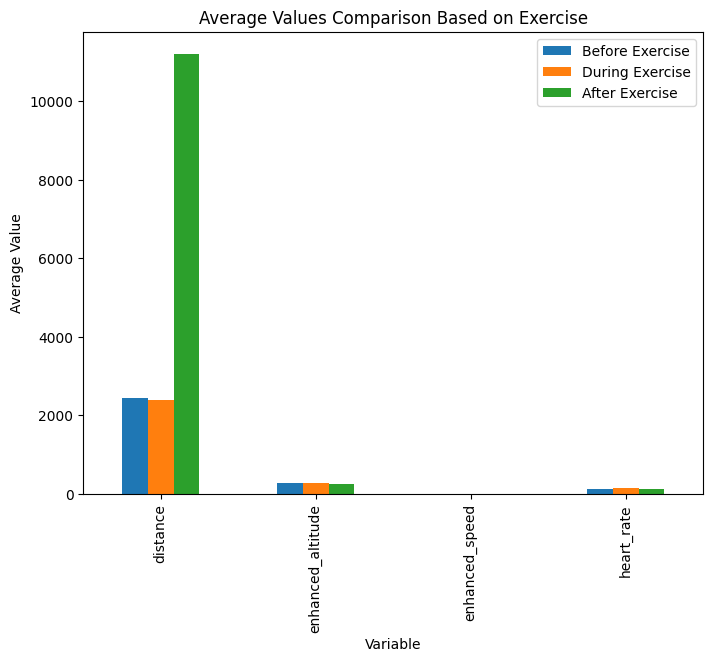

In [15]:
# Calculate the average values for the specified columns
average_df1 = df_before_plot[['distance', 'enhanced_altitude', 'enhanced_speed', 'heart_rate']].mean()
average_df2 = df_during_plot[['distance', 'enhanced_altitude', 'enhanced_speed', 'heart_rate']].mean()
average_df3 = df_after_plot[['distance', 'enhanced_altitude', 'enhanced_speed', 'heart_rate']].mean()

# Consolidate the averages into one DataFrame
average_df = pd.DataFrame({'Before Exercise': average_df1, 'During Exercise': average_df2, 'After Exercise': average_df3})

# Create a bar chart
average_df.plot(kind='bar', figsize=(8,6))
plt.title('Average Values Comparison Based on Exercise')
plt.ylabel('Average Value')
plt.xlabel('Variable')
plt.show()

Distance: Since the bar for 'distance' is about four times taller for 'after exercise' than 'before exercise' or 'during exercise', it suggests that significantly more distance was covered after the exercise session. It would be beneficial to further explore what happened in the 'after exercise' period - was there more movement or activity, such as a cool-down session with much longer distance covered than the actual exercise?

Enhanced Altitude: The extremely low and equal height bars across all three stages indicates that there is minimal variation in altitude during all stages of exercise. This suggests that the exercise routine was carried out at a consistent altitude.

Enhanced Speed: The absence of bars for 'Enhanced Speed' might show the values might be zero or near zero, indicating no change in speed was recorded.

Given the minor changes in heart rate across all three stages, it suggests that the intensity of the exercise might have been quite steady or the subject might have maintained a relatively consistent level of exertion throughout the entire process. The minor differences in heart rate could also potentially be attributed to the individual's fitness level, where a fit person might have a lower increase in heart rate compared to an unfit individual for the same exercise intensity.